# color with hsv

HSL (hue, saturation, lightness) and HSV (hue, saturation, value) are alternative representations of the RGB color model. 

Code snippets and ideas from https://adamspannbauer.github.io/2018/03/02/app-icon-dominant-colors/



In [39]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from collections import Counter
import cv2
import numpy as np
import json
import glob
import matplotlib.pyplot as plt
import time
from sklearn.metrics import calinski_harabaz_score

In [40]:
def get_dominant_color(image, k, image_processing_size = (50, 50)):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input


    """
    
    #reshape the image to be a list of pixels
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 

    clt = MiniBatchKMeans(n_clusters = k).fit(image)    
   
    
#     clt_2 = MiniBatchKMeans(n_clusters = k-2).fit(image)
#     clt_3 = MiniBatchKMeans(n_clusters = k-1).fit(image)
#     clt_5 = MiniBatchKMeans(n_clusters = k+1).fit(image)
#     clt_6 = MiniBatchKMeans(n_clusters = k+2).fit(image)
#     clt_7 = MiniBatchKMeans(n_clusters = k+3).fit(image)
#     clt_8 = MiniBatchKMeans(n_clusters = k+4).fit(image)
#     clt_9 = MiniBatchKMeans(n_clusters = k+5).fit(image)
#     clt_10 = MiniBatchKMeans(n_clusters = k+6).fit(image)
#     clt_11 = MiniBatchKMeans(n_clusters = k+7).fit(image)
#     clt_12 = MiniBatchKMeans(n_clusters = k+8).fit(image)
    
#     clt_list = [clt, clt_2, clt_3, clt_5, clt_6, clt_7, clt_8, clt_9, clt_10,
#                  clt_11,  clt_12]
#     CH_score = []

#     for model in clt_list:
#         labels = model.labels_
#         CH_score.append(calinski_harabaz_score(image, labels))
    
#     plt.plot([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], CH_score)
#     plt.xticks([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
#     plt.title("Calinski Harabaz Scores for Different Values of K")
#     plt.ylabel("Variance Ratio")
#     plt.xlabel("K=")
#     plt.show()
    
#     clt = MiniBatchKMeans(init='k-means++', n_clusters=k, batch_size=45,
#                       n_init=10, max_no_improvement=10, verbose=0).fit(image)
    
    labels = clt.predict(image)
    
#     plt.scatter(image[:, 0], image[:, 1], c=labels, s=10)
#     centers = clt.cluster_centers_
#     plt.scatter(centers[:,0], centers[:, 1], c='black', s=70)
#     plt.show()

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
    dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]
    dominant_color_4 = clt.cluster_centers_[label_counts.most_common(4)[3][0]]
    dominant_color_5 = clt.cluster_centers_[label_counts.most_common(5)[4][0]]
    dominant_color_6 = clt.cluster_centers_[label_counts.most_common(6)[5][0]]

    return list(dominant_color_1), list(dominant_color_2), list(dominant_color_3), list(dominant_color_4), list(dominant_color_5), list(dominant_color_6)

get_dominant_color function: 2.569s

Most prominent color:
red: 11  green:  15  blue:  18 
Hex:  #0b0f12

Second color:
red: 211  green:  15  blue:  189 
Hex:  #d3cbbd

Third color:
red: 56  green:  15  blue:  31 
Hex:  #382a1f

Fourth color:
red: 38  green:  36  blue:  31 
Hex:  #26241f

Fifth color:
red: 199  green:  138  blue:  97 
Hex:  #c78a61

Sixth color:
red: 76  green:  29  blue:  12 
Hex:  #4c1d0c


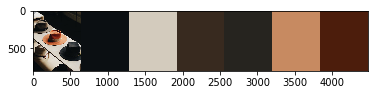

get_dominant_color function: 2.049s

Most prominent color:
red: 171  green:  163  blue:  146 
Hex:  #aba392

Second color:
red: 212  green:  163  blue:  219 
Hex:  #d4d7db

Third color:
red: 15  green:  163  blue:  23 
Hex:  #0f1217

Fourth color:
red: 100  green:  75  blue:  53 
Hex:  #644b35

Fifth color:
red: 40  green:  35  blue:  28 
Hex:  #28231c

Sixth color:
red: 7  green:  52  blue:  31 
Hex:  #07341f


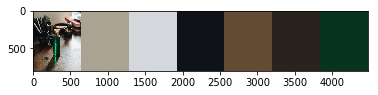

get_dominant_color function: 2.134s

Most prominent color:
red: 200  green:  206  blue:  211 
Hex:  #c8ced3

Second color:
red: 100  green:  206  blue:  117 
Hex:  #646f75

Third color:
red: 136  green:  206  blue:  106 
Hex:  #88746a

Fourth color:
red: 204  green:  165  blue:  136 
Hex:  #cca588

Fifth color:
red: 22  green:  33  blue:  41 
Hex:  #162129

Sixth color:
red: 7  green:  20  blue:  28 
Hex:  #07141c


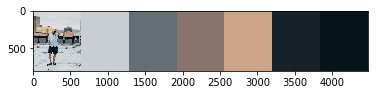

In [ ]:
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--imagePath", required=True,
# 	help="Path to image to find dominant color of")
# ap.add_argument("-k", "--clusters", default=3, type=int,
# 	help="Number of clusters to use in kmeans when finding dominant color")
# args = vars(ap.parse_args())


for i in glob.glob('./fohrtestimages/*'):
    #read in image of interest
    bgr_image = cv2.imread(i)
    #convert to HSV; this is a better representation of how we see color
    hsv_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2HSV)
    
    #extract 3 most dominant colors
    # (aka the centroid of the most popular k means cluster)
    start=time.time()
    dom_color_1, dom_color_2, dom_color_3, dom_color_4, dom_color_5, dom_color_6 = get_dominant_color(hsv_image, k=6)
    print('get_dominant_color function: {:.3f}s'.format(time.time()-start))
    
    #create a square showing dominant color of equal size to input image
    dom_color_1_hsv = np.full(bgr_image.shape, dom_color_1, dtype='uint8')
    #convert to bgr color space for display
    dom_color_1_rgb = cv2.cvtColor(dom_color_1_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_2_hsv = np.full(bgr_image.shape, dom_color_2, dtype='uint8')
    #convert to bgr color space for display
    dom_color_2_rgb = cv2.cvtColor(dom_color_2_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_3_hsv = np.full(bgr_image.shape, dom_color_3, dtype='uint8')
    #convert to bgr color space for display
    dom_color_3_rgb = cv2.cvtColor(dom_color_3_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_4_hsv = np.full(bgr_image.shape, dom_color_4, dtype='uint8')
    #convert to bgr color space for display
    dom_color_4_rgb = cv2.cvtColor(dom_color_4_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_5_hsv = np.full(bgr_image.shape, dom_color_5, dtype='uint8')
    #convert to bgr color space for display
    dom_color_5_rgb = cv2.cvtColor(dom_color_5_hsv, cv2.COLOR_HSV2RGB)
    
    #create a square showing dominant color of equal size to input image
    dom_color_6_hsv = np.full(bgr_image.shape, dom_color_6, dtype='uint8')
    #convert to bgr color space for display
    dom_color_6_rgb = cv2.cvtColor(dom_color_6_hsv, cv2.COLOR_HSV2RGB)
    
    #concat input image and dom color square side by side for display
    output_image = np.hstack((bgr_image[:,:,::-1], dom_color_1_rgb, dom_color_2_rgb, dom_color_3_rgb, dom_color_4_rgb, dom_color_5_rgb, dom_color_6_rgb))
    
    #show results to screen
    print('\nMost prominent color:\nred:', dom_color_1_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_1_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], 
                                                                             dom_color_1_rgb[0][0][1], 
                                                                             dom_color_1_rgb[0][0][2]))
    
    print('\nSecond color:\nred:', dom_color_2_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_2_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], 
                                                                             dom_color_2_rgb[0][0][1],
                                                                             dom_color_2_rgb[0][0][2]))
    
    print('\nThird color:\nred:', dom_color_3_rgb[0][0][0], ' green: ', dom_color_1_rgb[0][0][1],
          ' blue: ', dom_color_3_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], 
                                                                             dom_color_3_rgb[0][0][1], 
                                                                             dom_color_3_rgb[0][0][2]))
    print('\nFourth color:\nred:', dom_color_4_rgb[0][0][0], ' green: ', dom_color_4_rgb[0][0][1],
          ' blue: ', dom_color_4_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_4_rgb[0][0][0], 
                                                                             dom_color_4_rgb[0][0][1], 
                                                                             dom_color_4_rgb[0][0][2]))
    
    print('\nFifth color:\nred:', dom_color_5_rgb[0][0][0], ' green: ', dom_color_5_rgb[0][0][1],
          ' blue: ', dom_color_5_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_5_rgb[0][0][0], 
                                                                             dom_color_5_rgb[0][0][1],
                                                                             dom_color_5_rgb[0][0][2]))
    
    print('\nSixth color:\nred:', dom_color_6_rgb[0][0][0], ' green: ', dom_color_6_rgb[0][0][1],
          ' blue: ', dom_color_6_rgb[0][0][2], '\nHex: ', '#%02x%02x%02x' % (dom_color_6_rgb[0][0][0], 
                                                                             dom_color_6_rgb[0][0][1], 
                                                                             dom_color_6_rgb[0][0][2]))
    plt.imshow(output_image)
    plt.show()

In [49]:
dom_color = [94, 98, 88]
print('#%02x%02x%02x' % (int(dom_color[2]), int(dom_color[1]), int(dom_color[0])))

#58625e


Test of getting the Hue Saturation and Value

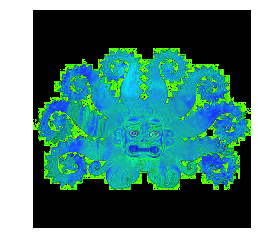

In [50]:
image = cv2.imread('./fohrtestimages/fohrimage.jpg')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
# show our image
plt.figure()
plt.axis("off")
plt.imshow(image)

In [51]:
image.shape

(224, 224, 3)

In [52]:
oriimg = cv2.imread('./fohrtestimages/fohrimage3.jpg',cv2.COLORMAP_HSV)
img = cv2.resize(oriimg,(50,50))

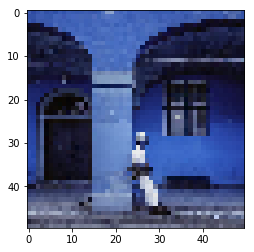

In [53]:
plt.imshow(img)

In [54]:

img = img.reshape((img.shape[0] * img.shape[1], 3))

    #cluster and assign labels to the pixels 
clt = KMeans(n_clusters = 35)
labels = clt.fit_predict(img)

    #count labels to find most popular
label_counts = Counter(labels)

    #subset out most popular centroid
dominant_color_1 = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
dominant_color_2 = clt.cluster_centers_[label_counts.most_common(2)[1][0]]
dominant_color_3 = clt.cluster_centers_[label_counts.most_common(3)[2][0]]


In [55]:
dominant_color_1

array([15.43457944, 14.47196262, 29.48130841])

In [56]:
label_counts.most_common(3)[1][0]

13

In [57]:
hex1 = '#%02x%02x%02x' % (dom_color_1_rgb[0][0][0], dom_color_1_rgb[0][0][1], dom_color_1_rgb[0][0][2])
hex2 = '#%02x%02x%02x' % (dom_color_2_rgb[0][0][0], dom_color_2_rgb[0][0][1], dom_color_2_rgb[0][0][2])
hex3 = '#%02x%02x%02x' % (dom_color_3_rgb[0][0][0], dom_color_3_rgb[0][0][1], dom_color_3_rgb[0][0][2])

In [58]:
color_dict = {'first_color':{'red': int(dom_color_1_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_1_rgb[0][0][2]), 
'hex': hex1}, 'second_color':{'red': int(dom_color_2_rgb[0][0][0]), 'green':int(dom_color_1_rgb[0][0][1]), 'blue: ': int(dom_color_2_rgb[0][0][2]), 'hex': hex2}, 
              'third_color':{'red': int(dom_color_3_rgb[0][0][0]), 'green': int(dom_color_1_rgb[0][0][1]), 'blue': int(dom_color_3_rgb[0][0][2]), 
'hex': hex3}}

In [59]:
type(color_dict['first_color']['hex'])

str

In [60]:
print(json.dumps(color_dict))

{"first_color": {"red": 17, "green": 22, "blue": 25, "hex": "#111619"}, "second_color": {"red": 23, "green": 22, "blue: ": 29, "hex": "#17181d"}, "third_color": {"red": 15, "green": 22, "blue": 16, "hex": "#0f1210"}}
